# 0.0. IMPORTS

In [5]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import datetime              
from tabulate              import tabulate
from scipy.stats           import chi2_contingency
from IPython.display       import Image
from IPython.core.display  import HTML

## 0.1 Helper Function

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

In [6]:
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [7]:
df_raw = pd.read_csv('data/train.csv', low_memory=False)

In [8]:
df_raw.sample()

,date,store,item,sales
419608,2016-12-25,10,23,26


# 1.0 STEP 01 - DESCRIPTION OF DATA

In [9]:
df1 = df_raw.copy()

## 1.1 Rename Columns

In [10]:
df1.columns

# It's not necessary to change the name or the format of the column names.

Index(['date', 'store', 'item', 'sales'], dtype='object')

## 1.2 Data Dimensions

In [11]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of Cols: {}'.format( df1.shape[1] ) )
# Evaluate the possibilite do use this project in your computer

Number of Rows: 913000
Number of Cols: 4


## 1.3 Data Types

In [12]:
df1.dtypes
# Observe date. It has a different data type.

date     object
store     int64
item      int64
sales     int64
dtype: object

In [13]:
# I will use "to_date" to change to datetime.
df1['date'] = pd.to_datetime( df1['date'] )

In [14]:
df1.dtypes
# We can see that everything is ok!

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

## 1.4 Check NA

In [15]:
df1.isna().sum()
# No missing values.

date     0
store    0
item     0
sales    0
dtype: int64

## 1.7. Descriptive Statistical

In [16]:
# As we not have categorical variables, I will just separate numeric values from the datetime value.
num_attributes = df1.select_dtypes( include=['int64'] )

In [17]:
num_attributes.sample()

,store,item,sales
184612,2,11,120


### 1.7.1 Numerical Attributes

In [19]:

# Central Tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ( ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis'])

In [20]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,10.0,9.0,5.500000,5.5,2.872281,0.000000,-1.224243
1,item,1.0,50.0,49.0,25.500000,25.5,14.430870,0.000000,-1.200960
2,sales,0.0,231.0,231.0,52.250287,47.0,28.801128,0.867112,0.509070


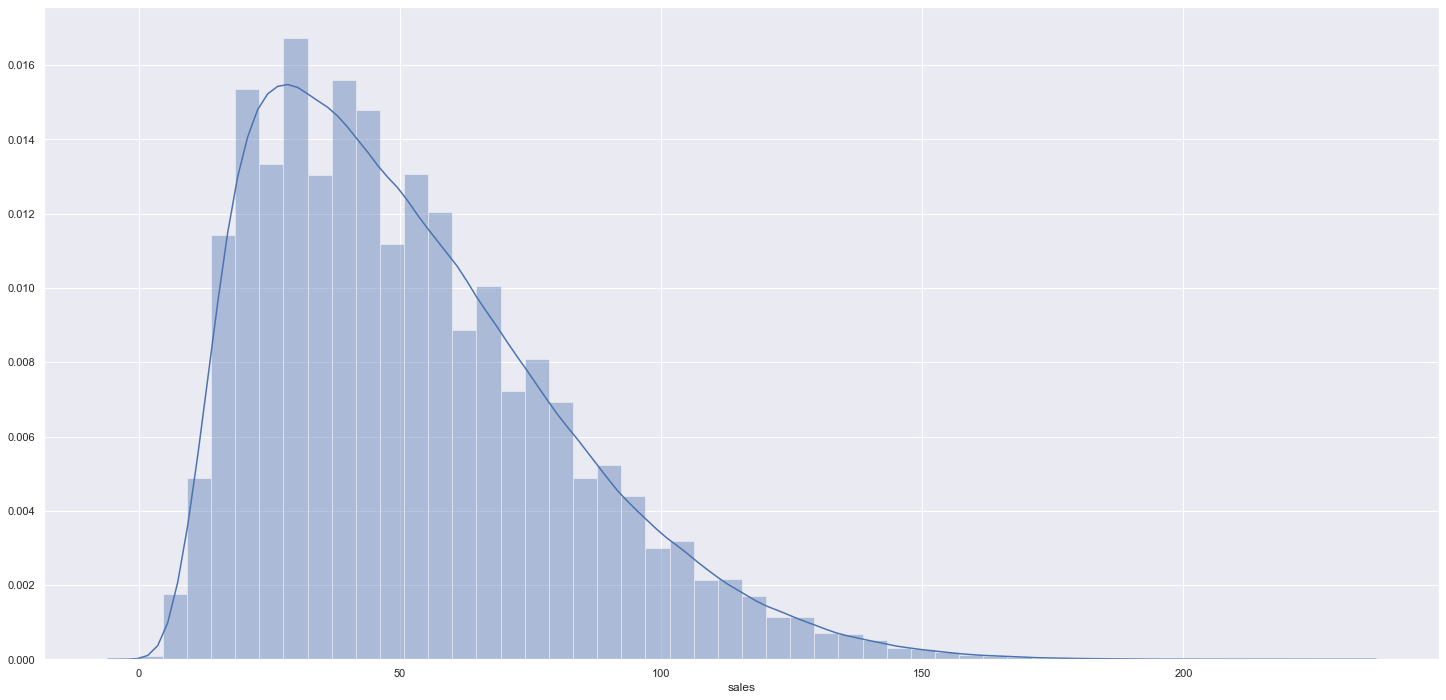

In [21]:
sns.distplot( df1['sales'] )

# 2.0 STEP 02 - FEATURE ENGINEERING

In [22]:
df2 = df1.copy()